#### <center> Implemetation du algorithme de Krushal

##### importation des bibliotheque

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

##### implementation de l'algorithme

In [2]:
def Kruskal(graphe):
    # On trie les arêtes par poids
    aretes = sorted(graphe.edges(data=True), key=lambda x: x[2]['weight'])

    # On crée une liste de sous-ensembles pour chaque sommet
    sous_ensembles = []
    for sommet in graphe.nodes():
        sous_ensembles.append([sommet])

    # On initialise la liste des arêtes de l'arbre couvrant minimal
    ACM = []

    # On parcourt les arêtes triées
    for arete in aretes:
        for sous_ensemble in sous_ensembles:
            if arete[0] in sous_ensemble:
                sous_ensemble1 = sous_ensemble
            if arete[1] in sous_ensemble:
                sous_ensemble2 = sous_ensemble
        if sous_ensemble1 != sous_ensemble2:
            ACM.append(arete)
            sous_ensembles.remove(sous_ensemble1)
            sous_ensembles.remove(sous_ensemble2)
            sous_ensembles.append(sous_ensemble1 + sous_ensemble2)

    return ACM

##### On crée un graphe pour tester l'algorithme 

In [3]:

G = nx.Graph()

# On ajoute des arêtes au graphe (nœud1, nœud2, poids)
G.add_edge('A', 'B', weight=1)
G.add_edge('B', 'C', weight=2)
G.add_edge('C', 'D', weight=12)
G.add_edge('D', 'A', weight=4)
G.add_edge('A', 'C', weight=5)
G.add_edge('B', 'D', weight=6)

##### On crée un nouveau graphe pour l'arbre minimal couvrant

In [4]:
ACM = Kruskal(G)
ACM_G = nx.Graph()
ACM_G.add_edges_from(ACM)

##### On affiche le graphe original

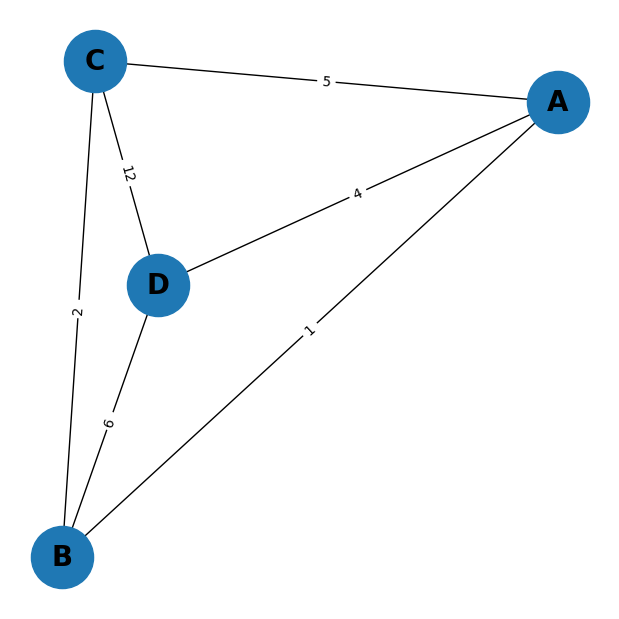

In [5]:
plt.figure(figsize=(6, 6))  # On cree une nouveau figure
pos = nx.spring_layout(G)  # On calcule la position des noued
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=20, font_weight='bold')

# On ajoute les cout des noued a la figure
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

plt.show()  # On affiche l'image

##### On affiche l'arbre couvrant minimal

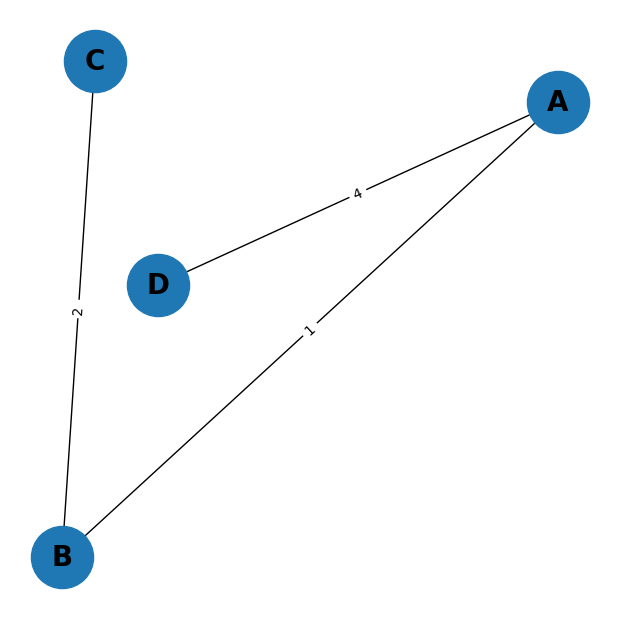

In [6]:

plt.figure(figsize=(6, 6)) 
nx.draw(ACM_G, pos, with_labels=True, node_size=2000, font_size=20, font_weight='bold')

edge_labels = nx.get_edge_attributes(ACM_G, 'weight')
nx.draw_networkx_edge_labels(ACM_G, pos=pos, edge_labels=edge_labels)

plt.show() 